__лабораторная работа N1:__  базовые методы машинного обучения, метрический подход

__цель:__ изучить возможности "классических" методов машинного обучения    
      на примере инструментов библиотеки scikit-learn

__порядок выполнения:__ для каждого типа задачи
1. получить/сгенерировать данные 
2. изучить/визуализировать данные
3. применить к ним соответствующий задаче метод,   
4. к результатам модели применить методы оценки  

In [2]:
import numpy as np

## данные

In [2]:
from sklearn import datasets
help(datasets)

Help on package sklearn.datasets in sklearn:

NAME
    sklearn.datasets

DESCRIPTION
    The :mod:`sklearn.datasets` module includes utilities to load datasets,
    including methods to load and fetch popular reference datasets. It also
    features some artificial data generators.

PACKAGE CONTENTS
    _base
    _california_housing
    _covtype
    _kddcup99
    _lfw
    _olivetti_faces
    _openml
    _rcv1
    _samples_generator
    _species_distributions
    _svmlight_format_fast
    _svmlight_format_io
    _twenty_newsgroups
    data (package)
    descr (package)
    images (package)
    setup
    tests (package)

FUNCTIONS
    clear_data_home(data_home=None)
        Delete all the content of the data home cache.
        
        Parameters
        ----------
        data_home : str, default=None
            The path to scikit-learn data directory. If `None`, the default path
            is `~/sklearn_learn_data`.
    
    dump_svmlight_file(X, y, f, *, zero_based=True, comment=No

## классификация

### сгенерировать/скачать данные

In [438]:
# from sklearn.datasets import make_moons
# from sklearn.datasets import make_circles
# from sklearn.datasets import make_blobs
# from sklearn.datasets import load_iris
from sklearn.datasets import load_wine

dataset = load_wine()
data = dataset['data']
target= dataset['target']

In [439]:
# https://archive.ics.uci.edu
# https://www.openml.org/search?type=data
from sklearn.datasets import fetch_openml
# help(fetch_openml)

### разделить данные

In [522]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

### изучение/визуализация данных

In [441]:
import pandas as pd
import matplotlib.pyplot as plt

columns = dataset['feature_names'].copy()
columns.append('tg')
df = pd.DataFrame(np.hstack([data, target.reshape(-1, 1)]), columns = columns)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,tg
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [477]:
from sklearn.datasets import make_classification

In [521]:
data, target = make_classification(200, 15)

### модель

In [523]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier().fit(X_train, y_train)

In [524]:
y_pred = clf.predict(X_test)

In [525]:
y_prob = clf.predict_proba(X_test)

### оценка классификатора

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [481]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [526]:
print(confusion_matrix(y_test, y_pred))

[[26  4]
 [ 4 16]]


Confusion matrix, without normalization
[[26  4]
 [ 4 16]]
Normalized confusion matrix
[[0.87 0.13]
 [0.2  0.8 ]]


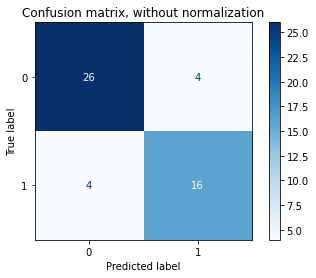

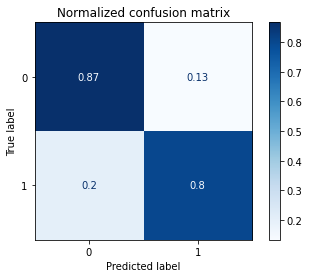

In [527]:
from sklearn.metrics import ConfusionMatrixDisplay

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [528]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.80      0.80      0.80        20

    accuracy                           0.84        50
   macro avg       0.83      0.83      0.83        50
weighted avg       0.84      0.84      0.84        50



https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [529]:
fpr, tpr, treshold = roc_curve(y_test, y_prob[:, 1])

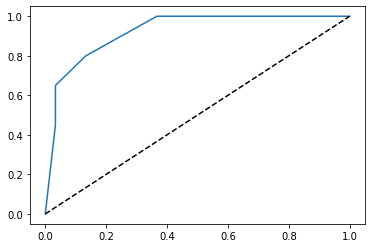

In [530]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ls='--', c='k')

In [531]:
fpr

array([0.  , 0.03, 0.03, 0.13, 0.37, 0.73, 1.  ])

In [535]:
y_prob[:, 1]

array([0. , 0.8, 1. , 1. , 0.2, 0. , 0.2, 0.2, 0. , 0.2, 0.4, 0. , 0.2,
       0.4, 0.6, 0.2, 0.6, 0.4, 0.2, 0.2, 0.2, 0.4, 1. , 0.4, 0.4, 1. ,
       0.2, 0. , 0.6, 1. , 0. , 0.4, 0.4, 0.8, 0.8, 0. , 0.4, 1. , 1. ,
       0.6, 1. , 0.6, 0.8, 0.4, 1. , 0. , 0.4, 1. , 0.2, 0.6])

In [532]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1])

In [533]:
y_test

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1])

## регрессия 

### сгенерировать/скачать данные

In [415]:
# from sklearn.datasets import fetch_openml
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
data = dataset['data']
target= dataset['target']
columns = dataset['feature_names'].copy()
columns.append('tg')
df = pd.DataFrame(np.hstack([data, target.reshape(-1, 1)]), columns = columns)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,tg
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [416]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [ ]:
# https://archive.ics.uci.edu
# https://www.openml.org/search?type=data
from sklearn.datasets import fetch_openml
# help(fetch_openml)

### модель регресии

https://scikit-learn.org/stable/modules/kernel_ridge.html

In [418]:
from sklearn.kernel_ridge import KernelRidge

model = KernelRidge().fit(X_train, y_train)
y_pred = model.predict(X_test)

### оценка регресии

In [419]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred))

0.6454487766799917


In [420]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [421]:
print(mean_squared_error(y_test, y_pred))

0.5707877545343111


## кластеризация

### сгенерировать/скачать данные

In [367]:
from sklearn.datasets import make_blobs

n_samples = 500
n_cls = 2
mu1 = np.array([0, 0])
mu2 = np.array([8, 6])
mu3 = np.array([-1, 8])

X,y = make_blobs( 
        n_samples=n_samples,
        centers=[mu1, mu2, mu3],  
        cluster_std=[1, 2, 1.5]
    )

In [368]:
# https://archive.ics.uci.edu
# https://www.openml.org/search?type=data
from sklearn.datasets import fetch_openml
# help(fetch_openml)

### изучение/визуализация данных

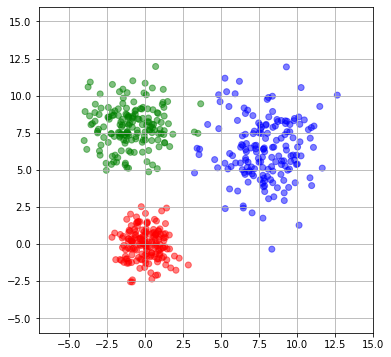

In [369]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.xlim(-7, 15)
plt.ylim(-6, 16)
plt.scatter(X[:,0], X[:,1], c = [['r','b','g','y'][j] for j in y], alpha=0.5 )   
plt.grid()
plt.show()

In [370]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, )

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((250, 2), (250,), (250, 2), (250,))

* 'b' - синий цвет
* 'g' - зеленый цвет
* 'r' - красный цвет
* 'c' - голубой цвет
* 'm' - пурпурный цвет
* 'y' - желтый цвет
* 'k' - черный цвет
* 'w' - белый цвет

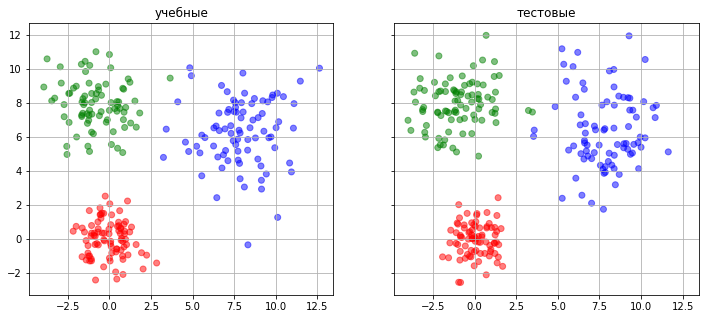

In [371]:
def plot_data(ax,X,y,t, marker='o'):
    c = [ ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'darkorange'][j] for j in y  ]
    ax.set_title(t)
    ax.scatter( x=X[:,0], y=X[:,1], c=c,  alpha=0.5, marker=marker )
    ax.grid()

fig, (ax0,ax1) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(ax0,X_train,y_train,'учебные')    
plot_data(ax1,X_test,y_test,'тестовые')    
plt.show()

### модели кластеризаторов

In [386]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN

model_KMeans = KMeans(3).fit(X_train)
y_pred_KMeans = model_KMeans.predict(X_test)

model_MeanShift = MeanShift().fit(X_train)
y_pred_MeanShift = model_MeanShift.predict(X_test)

model_DBSCAN = DBSCAN(1.8).fit(X_train)
y_pred_DBSCAN = model_DBSCAN.fit_predict(X_test)

### оценка кластеризации

In [373]:
from sklearn.metrics import silhouette_score

Данная величина лежит в диапазоне $[-1, 1]$. Значения, близкие к -1, соответствуют плохим (разрозненным) кластеризациям, значения, близкие к нулю, говорят о том, что кластеры пересекаются и накладываются друг на друга, значения, близкие к 1, соответствуют "плотным" четко выделенным кластерам. 

In [387]:
print(silhouette_score(X_test, y_pred_KMeans))
print(silhouette_score(X_test, y_pred_MeanShift))
print(silhouette_score(X_test, y_pred_DBSCAN))

0.6839393616309479
0.6839393616309479
0.5988455163055125


In [375]:
y_pred_KMeans

array([0, 0, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 1, 1,
       0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1,
       2, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0,
       2, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 2, 2,
       2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2,
       1, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0,
       2, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0,
       1, 1, 2, 2, 2, 0, 1, 0])

In [389]:
xlim = (-6, 13)
ylim = (-4, 15)
dist = 0.25
x2, y2 = np.meshgrid(np.linspace(xlim[0], xlim[1], round(xlim[1] - xlim[0] / dist)), np.linspace(ylim[0], ylim[1], round(ylim[1] - ylim[0] / dist)))
X_grid = np.hstack([x2.reshape(-1, 1), y2.reshape(-1, 1)])
y_grid = model_KMeans.predict(X_grid)

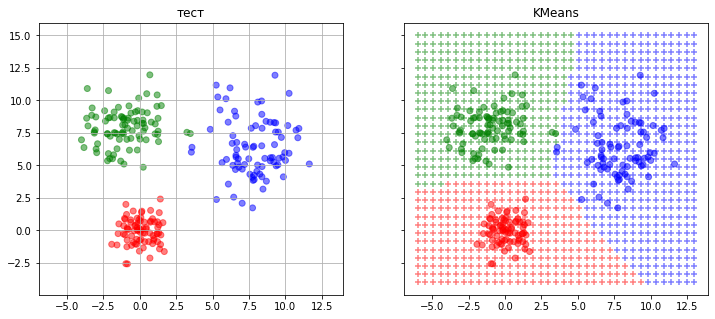

In [390]:
fig, (ax0,ax1) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(ax0,X_test,y_test,'тест')    
plot_data(ax1,X_test,y_pred_KMeans,'KMeans')    
plot_data(ax1,X_grid,y_grid,'KMeans', marker='+')    
plt.show()

In [391]:
y_grid = model_MeanShift.predict(X_grid)

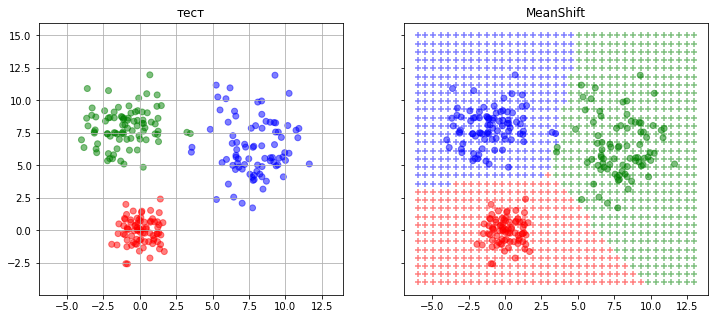

In [392]:
fig, (ax0,ax1) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(ax0,X_test,y_test,'тест')    
plot_data(ax1,X_test,y_pred_MeanShift,'MeanShift')    
plot_data(ax1,X_grid,y_grid,'MeanShift', marker='+')    
plt.show()

In [393]:
y_grid = model_DBSCAN.fit_predict(X_grid)

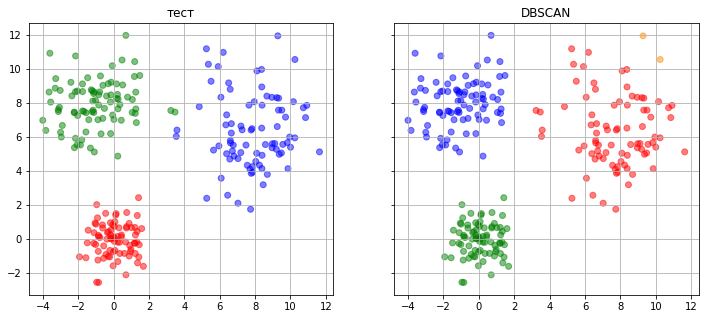

In [394]:
fig, (ax0,ax1) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(ax0,X_test,y_test,'тест')    
plot_data(ax1,X_test,y_pred_DBSCAN,'DBSCAN')    
# plot_data(ax1,X_grid,y_grid,'DBSCAN', marker='+')    
plt.show()

In [395]:
y_pred_DBSCAN

array([ 0,  0,  1,  2,  2,  0,  2,  2,  1,  1,  2,  1,  0,  0,  1,  2,  2,
        0,  2,  0,  1,  1,  0,  1,  0,  1,  2,  1,  1,  0,  2,  2,  0,  1,
        1,  2,  2,  2,  0,  1,  1,  2,  2,  1,  2,  0,  2,  0,  1,  1,  2,
        0,  0,  1,  1,  2,  2,  2,  2,  2,  0,  1,  2,  2,  2,  0,  2,  1,
        0,  1,  2,  1,  1,  0,  1,  0,  0,  1,  0,  1,  0,  1,  1,  2,  1,
        0,  2,  2,  2,  2,  0,  0,  2,  2,  1,  2,  1,  1,  0,  2,  0,  0,
        1,  2,  1,  2,  0,  2,  0,  2,  1,  2,  1,  0,  0,  1,  1,  1,  1,
        1,  0,  1,  2,  2,  0,  1,  0,  2,  0,  2,  2,  2,  1,  2,  1,  1,
        2,  0,  2,  1,  0,  0,  0,  0,  1,  0,  2,  2,  2,  1,  1, -1,  0,
        2,  2,  2,  2,  0,  2,  2,  1,  0,  2,  1,  2,  0,  0,  0,  1,  0,
        1,  2,  0,  0,  1,  0,  2,  2,  1,  1,  1,  1,  0,  1,  0,  0,  1,
        0,  0,  1,  1,  0,  2,  0,  0,  1,  1, -1,  2,  2,  0,  1,  2,  0,
        0,  2,  1,  0,  1,  1,  2,  1,  0,  2,  1,  2,  0,  0,  0,  0,  2,
        0,  2,  1,  1,  1

In [405]:
res = []
n_cl = []
x = np.arange(0.5, 2, 0.01)
for eps in x:
    model_DBSCAN = DBSCAN(eps).fit(X_train)
    y_pred_DBSCAN = model_DBSCAN.fit_predict(X_test)
    res.append(silhouette_score(X_test, y_pred_DBSCAN))
    n_cl.append(len(np.unique(y_pred_DBSCAN)))

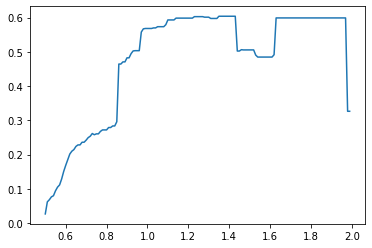

In [406]:
plt.plot(x, res)

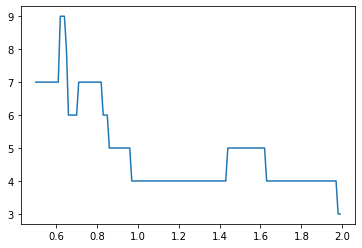

In [407]:
plt.plot(x, n_cl)

In [336]:
np.argmax(res)

64

In [338]:
res[64]

0.5139206063526592

In [339]:
x[64]

1.1400000000000006